Q1
各个⼩题的具体实现在⽂件 CSE598 Project 3-AILIU CHENG.ipynb 的代码中。 所有图的节点计数从 0 开始，⽼师所给出的示例是从 1 开始，所以输出结果，⽐如⽼师的输出样例是 2, 3, 4 , 那么我的结果输出则为 1, 2, 3 。使⽤命令进⾏安装pip install ，分别安装networkx、 pandas、numpy（或者scipy）、matplotlib等适用的库。


In [13]:
pip install networkx pandas numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import operator
from queue import Queue
import networkx as nx
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm

import matplotlib.pyplot as plt
import scipy.integrate as spi

from networkx.algorithms.community import k_clique_communities
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman
import warnings

%matplotlib inline

In [15]:
warnings.filterwarnings(action='ignore')

In [16]:
# read the csv file, return a matrix
def read_csv(file_name):
    df_rates = pd.read_csv(file_name, index_col=[0])
    df = df_rates.values.tolist()
    
    return np.array(df)

In [17]:
# save matrix to csv file
def save_m_csv(matrix, res_file_name):
    np.savetxt(res_file_name, matrix, delimiter=',')

Q1.1 使用暴力法找到输入图矩阵中的最大团。以 CSV 文件格式的图形的相邻矩阵作为输入，所有节点作为字符串输出。

In [5]:
# read csv file to matrix
matrix_1_1 = read_csv(file_name='csvs/1.1.csv')

# create the graph
g_1_1 = nx.from_numpy_matrix(matrix_1_1)

FileNotFoundError: [Errno 2] No such file or directory: 'csvs/1.1.csv'

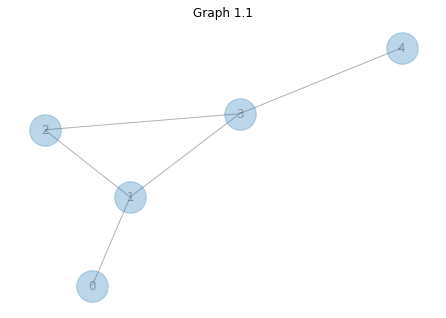

In [6]:
# make the graph
nx.draw(g_1_1, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.1")
plt.show()

In [7]:
# 返回图中的最大团，返回形式为节点的编号组成的字符串，当图中有多个最大团时，返回其中一个最大团即可。
def get_max_cliques(node, matrix):
    clique = {node}
    for i in range(len(matrix)):
        flag = True
        for c in clique:
            if matrix[i][c] == 0:
                flag = False
                break
        if flag:
            clique.add(i)

    return clique

In [8]:
max_cliques = []
# read csv file to matrix
matrix = read_csv(file_name='csvs/1.1.csv')

for i in range(5):
    c = get_max_cliques(i, matrix)
    if max_cliques.count(c) == 0:
        max_cliques.append(c)

max_cliques

[{0, 1}, {1, 2, 3}, {3, 4}]

In [9]:
# the answer for 1.1
max(max_cliques, key=len, default='')

{1, 2, 3}

**1.2   团过滤算法 CPM。输入为一个图的邻接矩阵（CSV 文件），输入图的节点数小于 10，设 k=3，返回所有团过滤算法找到的子社区（节点的编号组成的字符串）。  

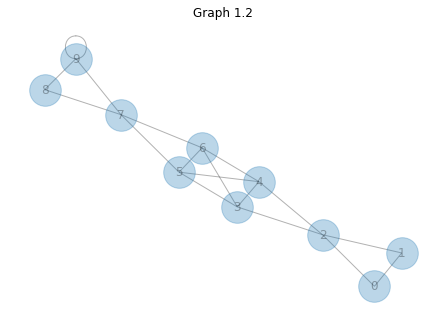

In [10]:
# 读取 csv 文件到矩阵
matrix_1_2 = read_csv(file_name='csvs/1.2.csv')

# 创建图表
g_1_2 = nx.from_numpy_matrix(matrix_1_2)

# 制作图表
nx.draw(g_1_2, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.2")
plt.show()

In [11]:
# CPM算法
# 输入一个图的邻接矩阵，返回所有子社区
def solution_1_2(csv_file_name, k):
    # 读取 csv 文件到矩阵
    matrix_1_2 = read_csv(file_name=csv_file_name)
    
    # 创建图表
    g_1_2 = nx.from_numpy_matrix(matrix_1_2)
    
    # 子社区
    c = list(k_clique_communities(g_1_2, k))
    return c

In [12]:
# the answer for 1.2
solution_1_2(csv_file_name='csvs/1.2.csv', k=3)

[frozenset({0, 1, 2}), frozenset({2, 3, 4, 5, 6, 7}), frozenset({7, 8, 9})]

**1.3   节点相似性。 输入为一个图的邻接矩阵（CSV 文件），输入图的节点数小于 10，将第一 个节点和第二个节点的杰卡德相似性以 float（浮点数）的形式返回（矩阵中的前两项）。

**Jaccard similarity algorithm**

$$
\Large \dfrac{\left| F\left( u\right) \cap F\left( v\right) \right| }{\left| F\left( u\right) \cup F\left( v\right) \right| }
$$

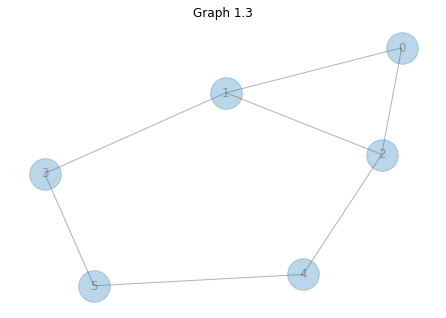

In [13]:
# 读取 csv 文件到矩阵
matrix_1_3 = read_csv(file_name='csvs/1.3.csv')

# 创建图表
g_1_3 = nx.from_numpy_matrix(matrix_1_3)

# 制作图表
nx.draw(g_1_3, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.3")
plt.show()

In [14]:
def solution_1_3(csv_file_name):
    # 读取 csv 文件到矩阵
    matrix_1_3 = read_csv(file_name=csv_file_name)

    data = matrix_1_3[0] + matrix_1_3[1]

    # 计算联合集
    union = np.count_nonzero(data == 2)
    # 计算交集
    intersection = np.count_nonzero(data == 1) + union

    if matrix_1_3[0][1] == 1 and matrix_1_3[1][0] == 1:
        intersection -= 2

    return union/intersection

In [15]:
# the answer for 1.3
solution_1_3(csv_file_name='csvs/1.3.csv')

0.5

**1.4 Modularity**

1.4   模块化社区。输入为一个图的邻接矩阵（CSV 文件），输入图的节点数小于 10，返回模块度矩阵（CSV 文件）

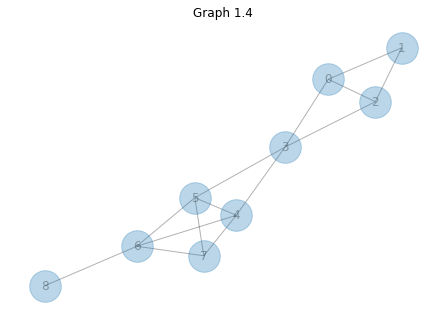

In [16]:
# 读取 csv 文件到矩阵
matrix_1_4 = read_csv(file_name='csvs/1.4.csv')

    # 创建图表
g_1_4 = nx.from_numpy_matrix(matrix_1_4)

# 制作图表
nx.draw(g_1_4, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.4")
plt.show()

In [17]:
def solution_1_4(csv_file_name, res_file_name):
    matrix_1_4 = read_csv(file_name=csv_file_name)
    
# 创建图表
    g = nx.from_numpy_matrix(matrix_1_4)
    
# 图的模块化矩阵
    m_matrix = nx.modularity_matrix(g)
    print('Result matrix:\n', m_matrix)
# 将图的模块化矩阵保存到 csv 文件
    save_m_csv(matrix=m_matrix, res_file_name=res_file_name)

In [18]:
# the answer for 1.4
# result file saved as `1_4_res.csv`
solution_1_4(csv_file_name='csvs/1.4.csv', res_file_name='1_4_res.csv')

Result matrix:
 [[-0.32142857  0.78571429  0.67857143  0.57142857 -0.42857143 -0.42857143
  -0.42857143 -0.32142857 -0.10714286]
 [ 0.78571429 -0.14285714  0.78571429 -0.28571429 -0.28571429 -0.28571429
  -0.28571429 -0.21428571 -0.07142857]
 [ 0.67857143  0.78571429 -0.32142857  0.57142857 -0.42857143 -0.42857143
  -0.42857143 -0.32142857 -0.10714286]
 [ 0.57142857 -0.28571429  0.57142857 -0.57142857  0.42857143  0.42857143
  -0.57142857 -0.42857143 -0.14285714]
 [-0.42857143 -0.28571429 -0.42857143  0.42857143 -0.57142857  0.42857143
   0.42857143  0.57142857 -0.14285714]
 [-0.42857143 -0.28571429 -0.42857143  0.42857143  0.42857143 -0.57142857
   0.42857143  0.57142857 -0.14285714]
 [-0.42857143 -0.28571429 -0.42857143 -0.57142857  0.42857143  0.42857143
  -0.57142857  0.57142857  0.85714286]
 [-0.32142857 -0.21428571 -0.32142857 -0.42857143  0.57142857  0.57142857
   0.57142857 -0.32142857 -0.10714286]
 [-0.10714286 -0.07142857 -0.10714286 -0.14285714 -0.14285714 -0.14285714
   0.8

1.5 社区密度。输入为一个图的邻接矩阵（CSV 文件），输入图的节点数小于 10，返回社区的密度 γ （float 浮点数）

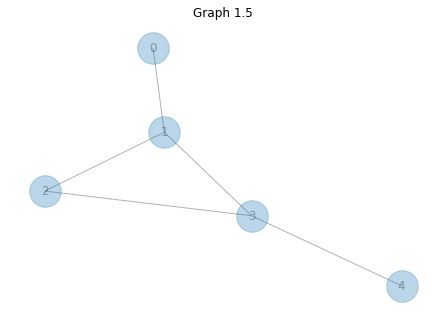

In [19]:
# 创建矩阵
matrix_1_5 = read_csv(file_name='csvs/1.5.csv')

# 创建图表
g_1_5 = nx.from_numpy_matrix(matrix_1_5)

# 制作图表
nx.draw(g_1_5, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.5")
plt.show()

In [20]:
#社区密度计算
def solution1_5(csv_file_name):
    # 读取 csv 文件到矩阵
    matrix_1_5 = read_csv(file_name=csv_file_name)

    # 创建图表
    g_1_5 = nx.from_numpy_matrix(matrix_1_5)

    return nx.density(g_1_5)

In [21]:
# the answer for 1.5
solution1_5(csv_file_name='csvs/1.5.csv')

0.5

1.6 Girvan-Newman 算法。计算边介数。输入为一个图的邻接矩阵（CSV 文件），输入图的节点数小于 10，返回图的初始边介数矩阵（CSV 文件）

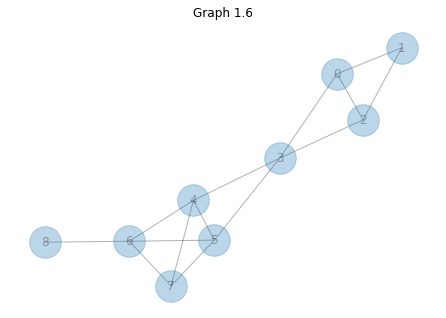

In [22]:
# 读取 csv 文件到矩阵
matrix_1_6 = read_csv(file_name='csvs/1.6.csv')

# 创建图表
g_1_6 = nx.from_numpy_matrix(matrix_1_6)

# 制作图表
nx.draw(g_1_6, with_labels=True, node_size=1000, alpha=0.3, arrows=False)
plt.title("Graph 1.6")
plt.show()

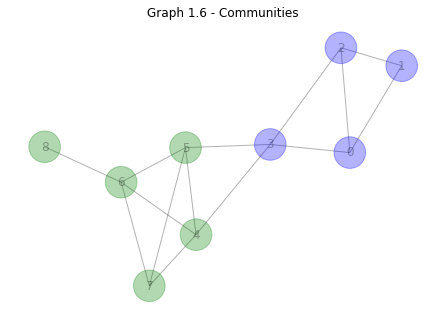

In [23]:
# 在图中找到社区
communities = girvan_newman(g_1_6)

# 找到形成社区的节点
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

# 绘制社区
color_map = []
for node in g_1_6:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('green')
nx.draw(g_1_6, node_color=color_map, with_labels=True, node_size=1000, alpha=0.3)
plt.title("Graph 1.6 - Communities")
plt.show()

In [24]:
def get_edge_betweenness_matrix(g, matrix):
    ebc = nx.centrality.edge_betweenness_centrality(g, normalized=False)
# 具有边缘中间值的点列表
    ebc_list = sorted(ebc.items(), key=operator.itemgetter(1))
    
    for tps in ebc_list:
        matrix[tps[0][0], tps[0][1]] = tps[1]
    
    return matrix.T

In [25]:
def solution_1_6(csv_file_name, res_file_name):
# 读取 csv 文件到矩阵
    matrix_1_6 = read_csv(file_name=csv_file_name)

# 创建图表
    g_1_6 = nx.from_numpy_matrix(matrix_1_6)
    
# 创建零填充矩阵，shape 是图形形状的输入邻接矩阵
    res_1_6_array = np.zeros((matrix_1_6.shape))
    res_1_6_array
    
# 邻接矩阵
    ebm = get_edge_betweenness_matrix(g=g_1_6, matrix=res_1_6_array)
    print('Result matrix:\n', ebm)
    # save matrix to csv file
    save_m_csv(matrix=ebm, res_file_name=res_file_name)

In [26]:
# the answer for 1.6
# result file saved as `1_6_res.csv`
solution_1_6(csv_file_name='csvs/1.6.csv', res_file_name='1_6_res.csv')

Result matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  4.  0.  0.  0.  0.  0.  0.  0.]
 [ 9.  0.  9.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  6.  6.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  3.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  8.  0.  0.]]


1.7 最大化级联传播。 输入为一个图的邻接矩阵，输入图的节点数小于 10，矩阵内的值为 0，则表示两个节点间没有相连，其他值（在 0 到 1 之间）则表示通过这条边激活下一个节点的阈值。设级联传播中的激活信号永远为 0.5（阈值大于 0.5 时，节点会被激活，小于或等于 0.5 时，则不会被激活）。再设预算 K=1，即起始激活点只能选择一个，使用贪婪算法寻找图中最适合的起始激活点，返回节点的编号（int 整数）。 

In [27]:
# 读取 csv 文件到矩阵
matrix_1_7 = read_csv(file_name='csvs/1.7.csv')
matrix_1_7

array([[0. , 0. , 0. , 0. , 0.4, 0.6],
       [0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0.1, 0. , 0.3],
       [0. , 0.8, 0. , 0. , 0. , 0. ],
       [0.4, 0.1, 0. , 0.4, 0. , 0. ],
       [0.6, 0. , 0. , 0.7, 0.3, 0. ]])

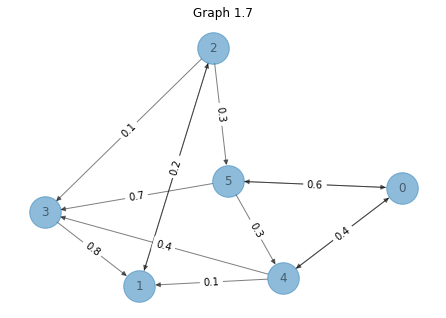

In [28]:
# 创建图表
g_1_7 = nx.from_numpy_matrix(matrix_1_7, create_using=nx.DiGraph)
layout = nx.spring_layout(g_1_7)

# 制作图表
nx.draw(g_1_7, layout, with_labels=True, node_size=1000, alpha=0.5)
labels = nx.get_edge_attributes(g_1_7, "weight")
nx.draw_networkx_edge_labels(g_1_7, pos=layout, edge_labels=labels)
plt.title("Graph 1.7")
plt.show()

In [29]:
# activation函数
def activation(node, matrix):
    actives = [node]
    q = Queue()
    q.put(node)
    
    while not q.empty():
        n = q.get()
        for i in range(len(matrix)):
            if matrix[n][i] >= .5 and actives.count(i) == 0.:
                q.put(i)
                actives.append(i)
                
    return actives

In [30]:
for i in range(len(matrix_1_7)):
    actives = activation(node=i, matrix=matrix_1_7)
    print(f'{i}: {actives}')

0: [0, 5, 3, 1]
1: [1]
2: [2]
3: [3, 1]
4: [4]
5: [5, 0, 3, 1]


In [31]:
# the answer for 1.7
res = []
for i in range(len(matrix_1_7)):
    res.append(activation(node=i, matrix=matrix_1_7))

print(max(max(res, key=len, default='')))

5


1.8   SIS 模型。输入两个整数，S0 和 I0，并输入两个小数,β 和 γ，(0<=S0<=99，1<=I0<=100，S0+I0=100，0<β<γ，并 0<γ<1), 输出 S，I 关于 t 的图像.

In [32]:
def solution_1_8(ini_value, _):
    y = np.zeros(2)
    x = ini_value
    
    # 易感个体的变化
    y[0] = - (beta * x[0]) * x[1] + gamma * x[1]
    
    # 感染的个体变化
    y[1] = (beta * x[0] * x[1]) - gamma * x[1]
    return y

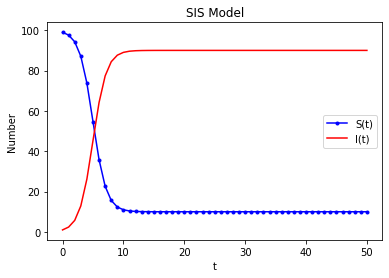

In [33]:
beta, gamma = 0.01, 0.1
I_0, S_0, T = 1, 99, 50

res = spi.odeint(func=solution_1_8, y0=(S_0, I_0), t=np.arange(0, T + 1))

# plot the SIS model
plt.plot(res[:, 0], color='blue', label='S(t)', marker='.')
plt.plot(res[:, 1], color='red', label='I(t)')
plt.title('SIS Model')
plt.legend()
plt.xlabel('t')
plt.ylabel('Number')
plt.show()

1.9   基于内容的推荐。 输入两个维数小于 10 的向量（CSV 文件），计算两者的余弦相似性（float 浮点数）。

In [34]:
# 读取 csv 文件到矩阵
df = pd.read_csv('csvs/1.9.csv', header=None).drop([0],axis=1)
np.array(df)

array([[3, 0, 3, 3, 1],
       [5, 4, 0, 2, 2]])

In [35]:
def solution_1_9(csv_file):
    df = np.array(pd.read_csv(csv_file, header=None).drop([0],axis=1))
    a, b = df[0], df[1]
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim

In [36]:
# the answer for 1.9
solution_1_9('csvs/1.9.csv')

0.6209416342294447

1.10 基于项目的协同过滤。 输入一个 4*4 的用户评分矩阵，评分的数值范围是 1 到 5，其中只有一个未知项目用 9 表示。101010大小 k=1，请使用余弦相似度与基于项目的协同过滤算预测数值 9 所代表的评分值（float 浮点数）。

In [37]:
df1_10 = pd.read_csv('csvs/1.10.csv', index_col=[0])
df1_10

,Lion King,Aladdin,Mulan,Anastasia
John,3,0,3,3
Joe,5,4,0,2
Jill,1,2,4,2
Jane,3,9,1,0
Jorge,2,2,0,1


In [38]:
matrix_1_10 = read_csv(file_name='csvs/1.10.csv')
matrix_1_10

array([[3, 0, 3, 3],
       [5, 4, 0, 2],
       [1, 2, 4, 2],
       [3, 9, 1, 0],
       [2, 2, 0, 1]])

In [39]:
# 项目平均评分
def get_item_rating_avg(matrix):
    # aladdin_rating_avg, lion_king_rating_avg
    return (sum(matrix[:, 1]) - 9)/4,(sum(matrix_1_10[:, 0]))/5

In [40]:
new_matrix = np.delete(matrix_1_10, 3, axis=0)
new_matrix

array([[3, 0, 3, 3],
       [5, 4, 0, 2],
       [1, 2, 4, 2],
       [2, 2, 0, 1]])

In [41]:
# k = 1
# 获取ok项目相似度
def get_ok_item_sim(matrix):
    sim_aladdin_lion_king = sum(matrix[:, 1] * matrix[:, 0]) / ((np.sqrt(
        (sum(matrix[:, 1] ** 2))) * (np.sqrt(sum(matrix[:, 0] ** 2)))))

    sim_aladdin_mulan = sum(matrix[:, 1] * new_matrix[:, 2]) / ((np.sqrt(
        (sum(matrix[:, 1] ** 2))) * (np.sqrt(sum(matrix[:, 2] ** 2)))))

    sim_aladdin_anastasia = sum(new_matrix[:, 1] * matrix[:, 3]) / ((np.sqrt(
        (sum(matrix[:, 1] ** 2))) * (np.sqrt(sum(matrix[:, 3] ** 2)))))

    return max(sim_aladdin_lion_king, sim_aladdin_mulan, sim_aladdin_anastasia)

In [42]:
# the answer for 1.10
ok_item_sim = get_ok_item_sim(new_matrix)
ok_rating_avg, item_rating_avg = get_item_rating_avg(matrix_1_10)

a = (ok_item_sim *
     (matrix_1_10[0][3] - item_rating_avg)) / ok_item_sim

pred_jane_aladdin = ok_rating_avg + a
pred_jane_aladdin

2.2